In [3]:
pip install diffusers

     -------------------------------------- 737.4/737.4 kB 9.2 MB/s eta 0:00:00



In [9]:
torch.cuda.empty_cache()

In [4]:
pipe.scheduler

DPMSolverMultistepScheduler {
  "_class_name": "DPMSolverMultistepScheduler",
  "_diffusers_version": "0.14.0",
  "algorithm_type": "dpmsolver++",
  "beta_end": 0.012,
  "beta_schedule": "scaled_linear",
  "beta_start": 0.00085,
  "clip_sample": false,
  "dynamic_thresholding_ratio": 0.995,
  "lower_order_final": true,
  "num_train_timesteps": 1000,
  "prediction_type": "v_prediction",
  "sample_max_value": 1.0,
  "set_alpha_to_one": false,
  "skip_prk_steps": true,
  "solver_order": 2,
  "solver_type": "midpoint",
  "steps_offset": 1,
  "thresholding": false,
  "trained_betas": null
}

In [1]:
import torch
torch_device="cuda" if torch.cuda.is_available() else "cpu"

D:\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
D:\anaconda\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


D:\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
D:\anaconda\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
D:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'
vae\diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Keyword arguments {'num_inference_steps': 30} are not expected by StableDiffusionPipeline and will be ignored.


  0%|          | 0/50 [00:00<?, ?it/s]

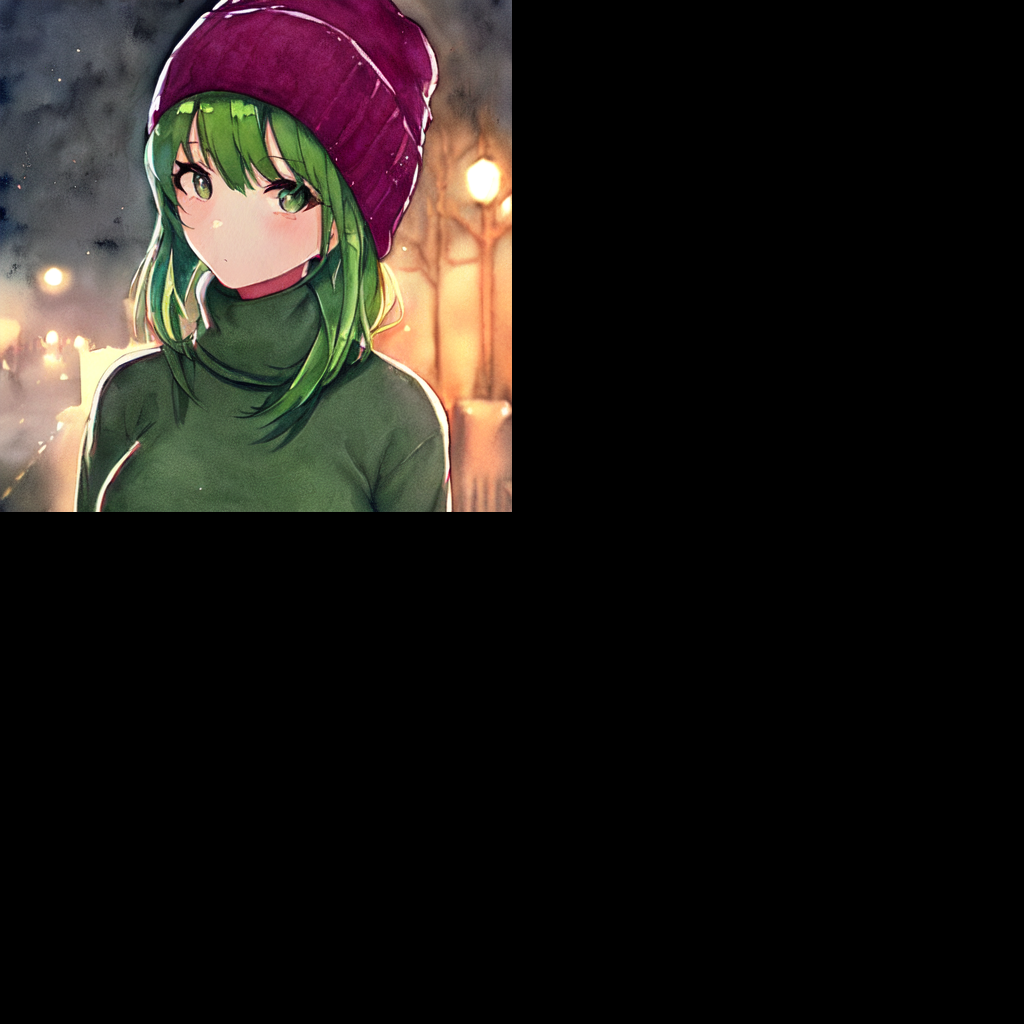

In [1]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
pipe = StableDiffusionPipeline.from_pretrained(
    'hakurei/waifu-diffusion',
    torch_dtype=torch.float16,
    cache_dir="D:\.cache\huggingface\hub",
    num_inference_steps = 30
).to('cuda')
# pipe.enable_attention_slicing()
pipe.safety_checker = lambda images, clip_input: (images, False)
prompt = "masterpiece, best quality, 1girl, green hair, sweater, looking at viewer, upper body, beanie, outdoors, watercolor, night, turtleneck"
with autocast("cuda"):
    image = pipe(prompt, guidance_scale=6)
from PIL import Image                                                                                                                                                                                                                         

def image_grid(imgs, rows=2, cols=2):                                                                                                                                                                                                         
    w, h = imgs[0].size                                                                                                                                                                                                                       
    grid = Image.new('RGB', size=(cols*w, rows*h))                                                                                                                                                                                            
                                                                                                                                                                                                                                              
    for i, img in enumerate(imgs):                                                                                                                                                                                                            
        grid.paste(img, box=(i%cols*w, i//cols*h))                                                                                                                                                                                            
    return grid 
# image.save("test.png")
image_grid(image.images)

In [2]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

# model_id="stabilityai/stable-diffusion-2-1"
model_id="hakurei/waifu-diffusion"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16,cache_dir="D:\.cache\huggingface\hub")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.safety_checker = lambda images, clip_input: (images, False)
pipe = pipe.to("cuda")

D:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'
text_encoder\model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [9]:
import os
os.environ['TRANSFORMERS_CACHE']='D:\.cache'

In [6]:
pipe.scheduler.compatibles

[diffusers.schedulers.scheduling_ddpm.DDPMScheduler,
 diffusers.schedulers.scheduling_lms_discrete.LMSDiscreteScheduler,
 diffusers.schedulers.scheduling_dpmsolver_multistep.DPMSolverMultistepScheduler,
 diffusers.schedulers.scheduling_dpmsolver_singlestep.DPMSolverSinglestepScheduler,
 diffusers.schedulers.scheduling_pndm.PNDMScheduler,
 diffusers.schedulers.scheduling_deis_multistep.DEISMultistepScheduler,
 diffusers.schedulers.scheduling_euler_discrete.EulerDiscreteScheduler,
 diffusers.schedulers.scheduling_heun_discrete.HeunDiscreteScheduler,
 diffusers.schedulers.scheduling_ddim.DDIMScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_discrete.KDPM2DiscreteScheduler,
 diffusers.schedulers.scheduling_unipc_multistep.UniPCMultistepScheduler,
 diffusers.schedulers.scheduling_k_dpm_2_ancestral_discrete.KDPM2AncestralDiscreteScheduler,
 diffusers.schedulers.scheduling_euler_ancestral_discrete.EulerAncestralDiscreteScheduler]

In [ ]:
pipe.enable_attention_slicing()

In [5]:
from PIL import Image                                                                                                                                                                                                                         

def image_grid(imgs, rows=2, cols=2):                                                                                                                                                                                                         
    w, h = imgs[0].size                                                                                                                                                                                                                       
    grid = Image.new('RGB', size=(cols*w, rows*h))                                                                                                                                                                                            
                                                                                                                                                                                                                                              
    for i, img in enumerate(imgs):                                                                                                                                                                                                            
        grid.paste(img, box=(i%cols*w, i//cols*h))                                                                                                                                                                                            
    return grid 

In [4]:
def get_inputs(batch_size=1):                                                                                                                                                                                                                 
  generator = [torch.Generator("cuda").manual_seed(i) for i in range(batch_size)]                                                                                                                                                             
  prompts = batch_size * [prompt]                                                                                                                                                                                                             
  num_inference_steps = 30                                                                                                                                                                                                                    

  return {"prompt": prompts, "generator": generator, "num_inference_steps": num_inference_steps}                                                                                                                                              

  0%|          | 0/30 [00:00<?, ?it/s]

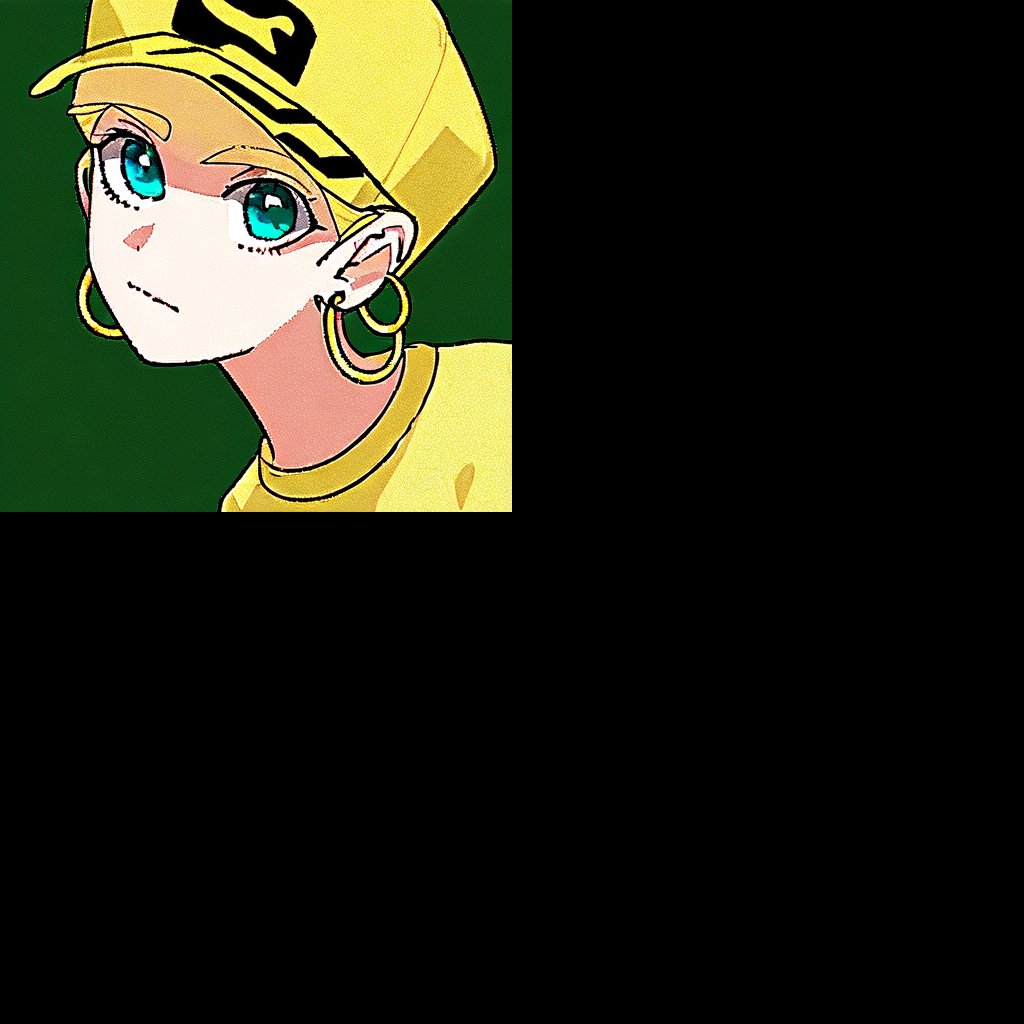

In [5]:
# prompt=input("prompt: ")
prompt = "1girl, aqua eyes, baseball cap, blonde hair, closed mouth, earrings, green background, hat, hoop earrings, jewelry, looking at viewer, shirt, short hair, simple background, solo, upper body, yellow shirt"
# prompt="portrait photo of a old warrior chief"
# prompt="portrait photo of a 14 years old pretty blond long haired girl with red skirt"
# negative_prompt=input("negative: ")
negative_prompt=""
images=pipe(**get_inputs(batch_size=1)).images

image_grid(images)

In [4]:
from numba import cuda
device=cuda.get_current_device()
device.reset()